In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
tb = pd.read_csv('petrol_consumption.csv')
tb = tb.drop(columns='Petrol_tax')
tb = tb.drop(columns='Paved_Highways')
tb

,Average_income,Population_Driver_licence(%),Petrol_Consumption
0,3571,0.525,541
1,4092,0.572,524
2,3865,0.580,561
3,4870,0.529,414
4,4399,0.544,410
5,5342,0.571,457
6,5319,0.451,344
7,5126,0.553,467
8,4447,0.529,464
9,4512,0.552,498


In [22]:
tb.shape

(48, 3)

In [24]:
tb.columns = ['середній дохід',  'к-ть водійське посвідчення (%)', 'споживання бензину']
# tb.describe().round(2)
tb.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
середній дохід,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
к-ть водійське посвідчення (%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
споживання бензину,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


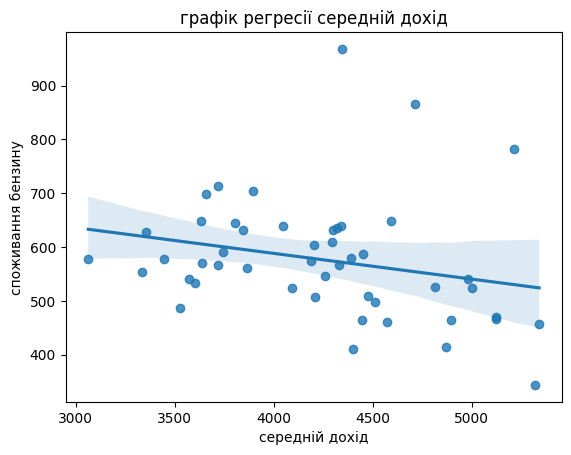

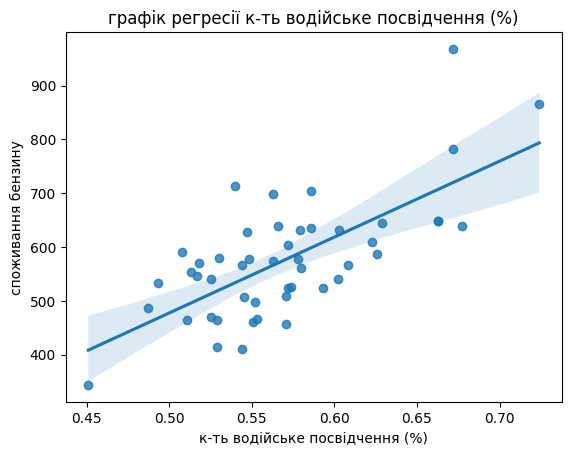

In [25]:
variables = [ 'середній дохід', 'к-ть водійське посвідчення (%)']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='споживання бензину', data=tb).set(title=f'графік регресії {var}')

In [26]:
corelations = tb.corr()
corelations

,середній дохід,к-ть водійське посвідчення (%),споживання бензину
середній дохід,1.000000,0.157070,-0.244862
к-ть водійське посвідчення (%),0.157070,1.000000,0.698965
споживання бензину,-0.244862,0.698965,1.000000


<AxesSubplot: >

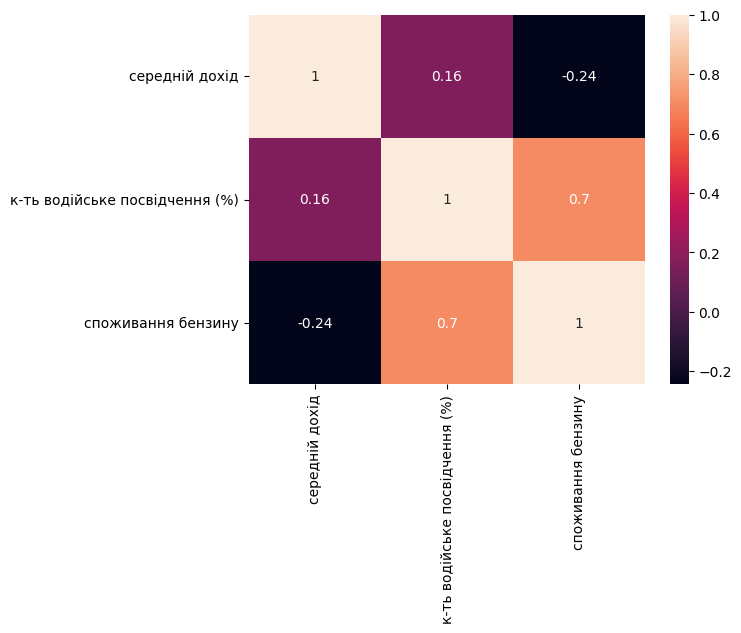

In [27]:
sns.heatmap(corelations, annot=True)

In [28]:
y = tb['споживання бензину']
X = tb[[ 'середній дохід', 'к-ть водійське посвідчення (%)']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [12]:
X_train

,середній дохід,к-ть водійське посвідчення (%)
38,3635,0.663
20,4593,0.663
12,4817,0.574
5,5342,0.571
43,3745,0.508
32,3063,0.578
36,4045,0.566
46,4296,0.623
23,4258,0.517
13,4207,0.545


In [30]:
y_train

38    648
20    649
12    525
5     457
43    591
32    577
36    640
46    610
23    547
13    508
35    644
33    628
25    566
10    580
30    571
21    540
18    865
2     561
15    635
8     464
26    577
7     467
39    968
44    782
31    554
22    464
41    699
29    534
16    603
28    574
34    487
42    632
6     344
47    524
27    631
4     410
17    714
0     541
Name: споживання бензину, dtype: int64

In [31]:
X.shape

(48, 2)

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
print('Beta:', model.coef_)
print('Beta0:', model.intercept_)

Beta: [-6.39302637e-02  1.60942906e+03]
Beta0: -59.417300016263994


In [34]:
y_pred = model.predict(X_test)

In [35]:
res = pd.DataFrame({"actual": y_test, "predict": y_pred})
res

,actual,predict
45,510,573.414830
3,414,480.630286
1,524,599.573481
14,566,642.169663
37,704,634.571889
40,587,663.659545
9,498,540.534189
11,471,457.826422
19,640,752.644896
24,460,534.961083


In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 67.12
Mean squared error: 5096.19
Root mean squared error: 71.39


In [19]:
model.score(X_test,y_test)

0.2685288206551123

In [20]:
model.score(X_train,y_train)

0.6363976023931577